In [1]:
import dask.dataframe as dd

In [2]:
from dask.distributed import Client
client=Client(n_workers=2, threads_per_worker=2) # this set up 1 worker per core
client.cluster

/Users/sandippandey/opt/anaconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55394 instead
  warnings.warn(


In [3]:
# importing libraries
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
#--------------------------------------------#

import pandas as pd
import numpy as np

%matplotlib inline

# option for pandas to display the columns
pd.options.display.max_columns=30

# setting the notebook mode for plotly

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# setting theme in cufflinks

cf.set_config_file(theme="pearl")
#-------
from ipywidgets import interact, interactive,fixed,interact_manual
import ipywidgets as widgets
import plotly.express as px
from scipy import stats





In [4]:
data=dd.read_csv('0 (1).part')
data.compute().head()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,17612922,{BD0D075D-7818-47B3-9657-7651CBD02219},155000,2012-09-28,S,N,F,YORK,YORK,YORK,A,A
1,17612923,{0FF70080-C8EA-4DDC-9C19-7651D9B540CC},264000,2012-07-18,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A,A
2,17612924,{80CC2177-EDBE-4ABB-9EAA-7651DAA0E4EE},20000,2012-04-25,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A
3,17612925,{076B2969-50D6-4659-8956-7651ECAAB904},89950,2012-10-25,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A,A
4,17612926,{9A6B1BBC-3522-4B44-9FD6-765202F73E28},168000,2012-04-13,S,N,F,TORQUAY,TORBAY,TORBAY,A,A


In [6]:
#start from here

# loading the file and converting date of Transfer column to datetime and assigning it as index column.

In [4]:
data1=pd.read_csv('0 (1).part',parse_dates=["Date of Transfer"],index_col="Date of Transfer")

In [5]:
data1

,Unnamed: 0,Transaction unique identifier,Price,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
Date of Transfer,,,,,,,,,,,
2012-09-28,17612922,{BD0D075D-7818-47B3-9657-7651CBD02219},155000,S,N,F,YORK,YORK,YORK,A,A
2012-07-18,17612923,{0FF70080-C8EA-4DDC-9C19-7651D9B540CC},264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A,A
2012-04-25,17612924,{80CC2177-EDBE-4ABB-9EAA-7651DAA0E4EE},20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A
2012-10-25,17612925,{076B2969-50D6-4659-8956-7651ECAAB904},89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A,A
2012-04-13,17612926,{9A6B1BBC-3522-4B44-9FD6-765202F73E28},168000,S,N,F,TORQUAY,TORBAY,TORBAY,A,A
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-20,22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A
2017-02-15,22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A
2017-02-24,22489345,{4C4EE000-291C-1854-E050-A8C063054F34},274000,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A


In [6]:
data1.index

DatetimeIndex(['2012-09-28', '2012-07-18', '2012-04-25', '2012-10-25',
               '2012-04-13', '2012-07-06', '2012-01-27', '2012-01-13',
               '2012-12-17', '2012-03-16',
               ...
               '2017-02-28', '2017-03-28', '2017-03-22', '2017-02-27',
               '2017-02-09', '2017-02-20', '2017-02-15', '2017-02-24',
               '2017-02-22', '2017-03-03'],
              dtype='datetime64[ns]', name='Date of Transfer', length=4876426, freq=None)

## Deleting the unnecessary columns

In [7]:
data_group1=data1[['Price', 'Property Type', 'Old/New', 'Duration', 'Town/City',
       'District', 'County', 'PPDCategory Type']]

In [8]:
data_group1.columns

Index(['Price', 'Property Type', 'Old/New', 'Duration', 'Town/City',
       'District', 'County', 'PPDCategory Type'],
      dtype='object')

In [9]:
data_group1.head()

,Price,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type
Date of Transfer,,,,,,,,
2012-09-28,155000,S,N,F,YORK,YORK,YORK,A
2012-07-18,264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A
2012-04-25,20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A
2012-10-25,89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A
2012-04-13,168000,S,N,F,TORQUAY,TORBAY,TORBAY,A


# Cleaning the data

In [10]:
data_group3=data_group1.loc[(data_group1['Price'] >= (4000))]
data_group3

,Price,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type
Date of Transfer,,,,,,,,
2012-09-28,155000,S,N,F,YORK,YORK,YORK,A
2012-07-18,264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A
2012-04-25,20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A
2012-10-25,89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A
2012-04-13,168000,S,N,F,TORQUAY,TORBAY,TORBAY,A
...,...,...,...,...,...,...,...,...
2017-02-20,175000,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A
2017-02-15,586945,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A
2017-02-24,274000,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A


In [11]:
#data_group3[data_group3.duplicated(subset="Price")]

In [135]:
#data_group3.drop_duplicates()

,Price,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type
Date of Transfer,,,,,,,,
2012-09-28,155000,S,N,F,YORK,YORK,YORK,A
2012-07-18,264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A
2012-04-25,20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A
2012-10-25,89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A
2012-04-13,168000,S,N,F,TORQUAY,TORBAY,TORBAY,A
...,...,...,...,...,...,...,...,...
2017-03-03,144000,T,N,F,BATLEY,KIRKLEES,WEST YORKSHIRE,A
2017-02-16,124000,S,N,F,BRIGHOUSE,CALDERDALE,WEST YORKSHIRE,A
2017-03-22,175000,D,N,F,HEBDEN BRIDGE,CALDERDALE,WEST YORKSHIRE,A


In [12]:
data_group3

,Price,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type
Date of Transfer,,,,,,,,
2012-09-28,155000,S,N,F,YORK,YORK,YORK,A
2012-07-18,264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A
2012-04-25,20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A
2012-10-25,89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A
2012-04-13,168000,S,N,F,TORQUAY,TORBAY,TORBAY,A
...,...,...,...,...,...,...,...,...
2017-02-20,175000,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A
2017-02-15,586945,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A
2017-02-24,274000,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A


## Checking the Mean price of housing on the basis of Years, Months and Days and visualizing

### Yearly basis

In [13]:
data_group3.Price.resample('Y').mean().iplot(kind="bar",title="Mean price of housing for each years")


<b><mark> This visualization shows the average housing price on the basis of years for the dataset. There has been no decrease in the average housing price between the years 2012 to 2017 as you can see from the graph. But the increase is also steady since real state business tends to increase every year.</mark></b>

### Daily basis

In [14]:
data_group3.Price.resample('D').mean().iplot(kind='line',title="Mean price on the basis of Days")


 <b><mark><span style='color:blue'> This graph shows the price of housing on the daily basis which is why it is difficult to plot graphically because daily datas are too long to plot here. So, looking at this graph we know this is kind of messy but we just wanted to see the trend of days.For better understanding we can zoom in on specific period to check the trend in that period on day basis.</mark></span></b>

### Monthly Basis

In [15]:
data_group3.resample('M').Price.mean().iplot(kind="line",title="Monthly price for each year")

 <mark><span style='color:red'> Here is the line graph presenting the monthly average price for housing. As you can see, there has been quite ups and downs in the price on different months.</span></mark>

## Maximum Price trends from 2012 to 2017

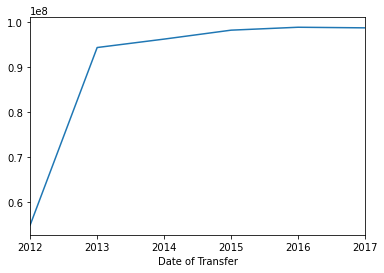

In [16]:
data_group3.resample('Y').Price.max().plot(kind='line',y="Price");

## Percentage change in Sales growth from previous years

In [17]:
a=data_group3.resample('Y')['Price'].sum().pct_change().iplot(kind='line',width=5)



<i><mark><span style='color:blue'> This line graph shows the trend in the change in sales growth from previous years. Here, we can see that percentage change in sales growth have been decreasing throughout the years.The most decrease has been seen from the years 2016 to 2017 which is in negative.</span></mark></i>

## Grouping the data on the basis of Property Type and County

In [18]:
x1=data_group3.groupby(["Property Type","County"])['Price'].max().reset_index()
x1

,Property Type,County,Price
0,D,BATH AND NORTH EAST SOMERSET,4500000
1,D,BEDFORD,2700000
2,D,BLACKBURN WITH DARWEN,1855000
3,D,BLACKPOOL,675000
4,D,BLAENAU GWENT,345000
...,...,...,...
556,T,WOKINGHAM,1500000
557,T,WORCESTERSHIRE,1030000
558,T,WREKIN,640000
559,T,WREXHAM,521000


### Property Type with most price on the basis of County

In [19]:
def func(x):
    x1[x1["Property Type"]==x].iplot(kind='bar',x="County",y="Price")


In [20]:
interact(func,x=data_group3["Property Type"].unique())


interactive(children=(Dropdown(description='x', options=('S', 'D', 'T', 'F', 'O'), value='S'), Output()), _dom…

<function __main__.func(x)>

 <b><span style='color:red'><mark> This graph shows the property type with most prices on the whole dataset for different County. Here, we can see that Greater London has highest price for all types of property. This may be because investing in housing near London area is quite expensive.</mark></span></b>

## Creating Year and Month columns for further analysis

In [21]:
data_group4=data_group3[['Price','Property Type', 'Old/New', 'Duration', 'Town/City',
       'District', 'County', 'PPDCategory Type']]
data_group4.reset_index(inplace=True)
data_group4['Year']=data_group4['Date of Transfer'].dt.strftime('%Y')
data_group4['Month'] = pd.DatetimeIndex(data_group4['Date of Transfer']).month
#data_group4['Month']=data_group4['Date of Transfer'].dt.strftime('%M')
data_group4

,Date of Transfer,Price,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Year,Month
0,2012-09-28,155000,S,N,F,YORK,YORK,YORK,A,2012,9
1,2012-07-18,264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A,2012,7
2,2012-04-25,20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,2012,4
3,2012-10-25,89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A,2012,10
4,2012-04-13,168000,S,N,F,TORQUAY,TORBAY,TORBAY,A,2012,4
...,...,...,...,...,...,...,...,...,...,...,...
4874257,2017-02-20,175000,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,2017,2
4874258,2017-02-15,586945,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,2017,2
4874259,2017-02-24,274000,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,2017,2
4874260,2017-02-22,36000,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,2017,2


### Grouping the Year and Property Type columns to see the total sales made by each type of Property in different years

In [22]:
data_group4.groupby(["Year","Property Type"])['Price'].sum().iplot(kind='bar')

<b><mark> This visualization shows how much sales was made through different types of property throughout each years. Here,we can see that sales of Detached property has been the most throughout all the years while Terraced property sales has also gone significantly up from 2012 to 2016.</mark></b>

###  Maximum price through each Year on the basis of Property Type

In [23]:
x2=data_group4.groupby(["Property Type","Year"])["Price"].max().iplot()
x2

 <b><mark><span style='color:blue'>Here we can see the maximum price of different types of property throughout the years. As you can see some properties prices are around 90 to 100 millions. For example a flat was sold at a whooping 90 M in 2017 to a radio tycoon Ashley Tabor.<link>https://www.mirror.co.uk/news/uk-news/radio-tycoon-splashes-out-90m-10465857</link></span></mark></b>